In [1]:
import torch
from torchvision import datasets, transforms
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root = './data',train = True, download = True,transform = transform)
test_dataset = datasets.MNIST(root = './data',train = False, download = True,transform = transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 40.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.20MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.13MB/s]


In [2]:
train_data,label = next(iter(train_dataset))
train_data.shape


torch.Size([1, 28, 28])

In [3]:
train_data_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = 32,shuffle = True)
test_data_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 32,shuffle = False)


In [4]:
train_data,label = next(iter(train_data_loader))
train_data[1].shape



torch.Size([1, 28, 28])


#Visualize the data

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

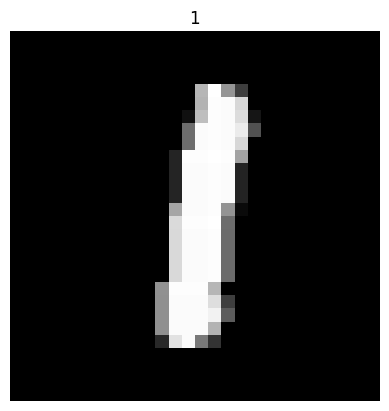

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0].squeeze(),cmap = "gray")
plt.title(label[0].item())
plt.axis(False)

In [6]:
import torch
from torch import nn
torch.manual_seed(42)
class MNIST_classifier(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,out_features =hidden_units ),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape)

    )
  def forward(self,x):
    return self.layer_stack(x)



In [7]:
#instantaniate the Model
import torch
torch.manual_seed(42)

Model_0 = MNIST_classifier(input_shape = 28*28,
                           hidden_units = 16,
                           output_shape = 10).to("cpu")
Model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0313, -0.0194, -0.0231,  ...,  0.0165,  0.0038,  0.0114],
                      [-0.0301, -0.0315, -0.0168,  ...,  0.0032,  0.0287, -0.0005],
                      [-0.0150, -0.0167, -0.0028,  ...,  0.0172,  0.0117, -0.0291]])),
             ('layer_stack.1.bias',
              tensor([ 0.0214,  0.0289,  0.0107,  0.0284, -0.0170, -0.0234, -0.0287, -0.0056,
                      -0.0035, -0.0203, -0.0122, -0.0115,  0.0344, -0.0026,  0.0290,  0.0034])),
             ('layer_stack.3.weight',
              tensor([[ 0.0891,  0.1441, -0.2301, -0.1127, -0.1900,  0.2429,  0.0917, -0.1048,
                       -0.1885,  0.1384,  0.0580, -0.1230, -0.1814, 

In [8]:
y_pred = Model_0(train_data).argmax(dim = 1)
y_pred


tensor([9, 9, 3, 3, 9, 9, 3, 9, 9, 9, 8, 3, 9, 9, 9, 3, 3, 9, 9, 3, 9, 3, 3, 9,
        9, 3, 9, 9, 9, 9, 9, 9])

In [9]:
label

tensor([1, 0, 1, 9, 9, 0, 3, 2, 0, 0, 3, 2, 2, 9, 6, 1, 1, 9, 3, 1, 0, 5, 1, 2,
        9, 7, 3, 5, 2, 6, 5, 6])

In [10]:
def accuracy_fn(y_true, y_pred):
  acc = torch.eq(y_true,y_pred).sum().item()
  acc /=len(y_true)
  acc *= 100
  return acc

In [11]:
acc = accuracy_fn(y_true = label,

                  y_pred = y_pred)
acc

15.625

In [12]:
#select the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = Model_0.parameters(),lr = 0.1)



#Train and Test the model

In [16]:
from tqdm.auto import tqdm
torch.manual_seed(42)
Epochs = 5;
for Epoch in tqdm(range(Epochs)):
  Loss = 0
  train_acc = 0
  Model_0.train()
  for batch , (X,Y) in enumerate(train_data_loader):
    #Do the forward pass
    predict = Model_0(X)
    #Calculate the loss
    loss = loss_function(predict,Y)
    Loss +=loss
    train_acc += accuracy_fn(y_true = Y,y_pred = predict.argmax(dim = 1))
    #Set optimizer zero grad
    optimizer.zero_grad()
    #Backpropagation
    loss.backward()
    #Set the gradient descent
    optimizer.step()
    if(batch%400==0):
      print(f"Exploered till the batch :{batch}")
  Loss /= len(train_data_loader)
  train_acc /= len(train_data_loader)
  Model_0.eval()
  test_loss =0
  test_acc = 0
  with torch.inference_mode():
    for x,y in test_data_loader:
      test_pred = Model_0(x)
      test_loss += loss_function(test_pred,y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim = 1))
    test_loss /= len(test_data_loader)
    test_acc /= len(test_data_loader)

  print(f"loss:{Loss:.4f},Train Accuracy :{train_acc:.4f},Test Loss:{test_loss:.4f},Test Accuracy:{test_acc:.4f}")










  0%|          | 0/5 [00:00<?, ?it/s]

Exploered till the batch :0
Exploered till the batch :400
Exploered till the batch :800
Exploered till the batch :1200
Exploered till the batch :1600
loss:0.1628,Train Accuracy :95.2050,Test Loss:0.1695,Test Accuracy:94.9581
Exploered till the batch :0
Exploered till the batch :400
Exploered till the batch :800
Exploered till the batch :1200
Exploered till the batch :1600
loss:0.1529,Train Accuracy :95.4317,Test Loss:0.1617,Test Accuracy:95.0779
Exploered till the batch :0
Exploered till the batch :400
Exploered till the batch :800
Exploered till the batch :1200
Exploered till the batch :1600
loss:0.1469,Train Accuracy :95.6267,Test Loss:0.1503,Test Accuracy:95.5571
Exploered till the batch :0
Exploered till the batch :400
Exploered till the batch :800
Exploered till the batch :1200
Exploered till the batch :1600
loss:0.1418,Train Accuracy :95.8017,Test Loss:0.1691,Test Accuracy:95.0978
Exploered till the batch :0
Exploered till the batch :400
Exploered till the batch :800
Exploered ti